In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from data_loaders import generate_heteroscedastic_one_dim_dataset
from loss import squared_loss
import numpy as np
from matplotlib.lines import Line2D 
from matplotlib.patches import Patch

In [2]:
X_train, y_train= generate_heteroscedastic_one_dim_dataset(n=750, p=0.2, seed=0)

In [3]:
cond_dros = []
joint_dros = []
for gamma in [1.0, 2.0, 4.0, 8.0, 16.0]:
    ru_gamma = pd.read_csv("results/inference_results_heteroscedastic_one_dim_ru_regression_{}_squared_loss_p_train_0.2_seed_0.csv".format(gamma))
    cond_dros.append(ru_gamma)
    joint_ru_gamma = pd.read_csv("results/inference_results_heteroscedastic_one_dim_joint_ru_regression_{}_squared_loss_p_train_0.2_seed_0.csv".format(gamma))
    if gamma == 1:
        joint_dros.append(ru_gamma)
    else:
        joint_dros.append(joint_ru_gamma)

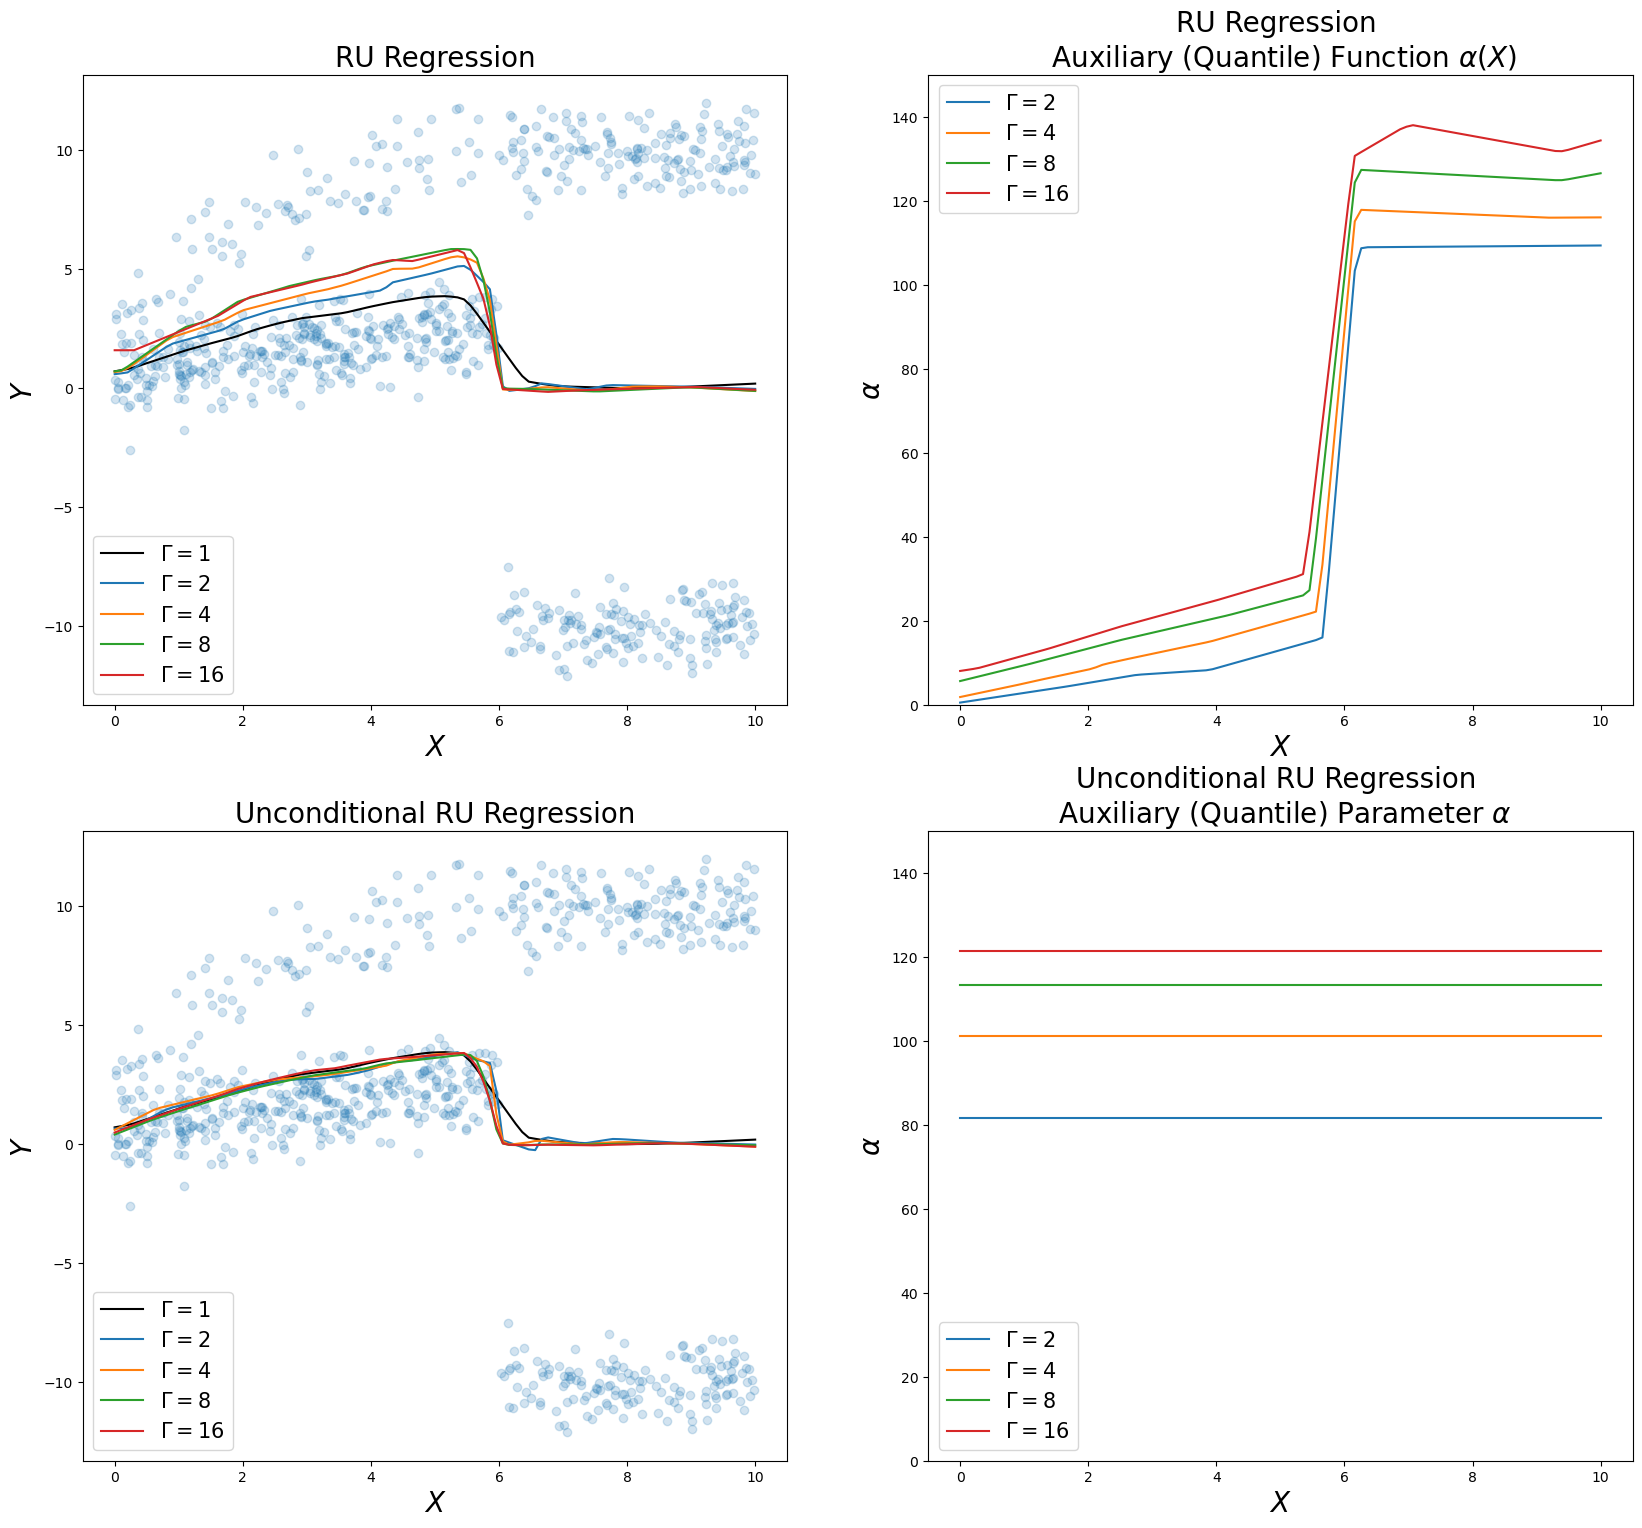

In [4]:
fig, ax =plt.subplots(2, 2, figsize=(20, 18))

names = [r"$\Gamma=1$", r"$\Gamma=2$", r"$\Gamma=4$", r"$\Gamma=8$", r"$\Gamma=16$"]
colors = ["black", "tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown"]

fontsize=20


for i in range(len(cond_dros)):
    ax[0, 0].plot(cond_dros[i]["X"].to_numpy().flatten(), cond_dros[i]["y"].to_numpy().flatten(), 
                   label=names[i], c=colors[i])
    if i!=0 :
        ax[0, 1].plot(cond_dros[i]["X"].to_numpy().flatten(), cond_dros[i]["alpha"].to_numpy().flatten(), 
                   label=names[i], c=colors[i])
        ax[1, 1].plot(joint_dros[i]["X"].to_numpy().flatten(), joint_dros[i]["alpha"].to_numpy().flatten(), 
                   label=names[i], c=colors[i])
    ax[1, 0].plot(joint_dros[i]["X"].to_numpy().flatten(), joint_dros[i]["y"].to_numpy().flatten(), 
                   label=names[i], c=colors[i])

for i in [0, 1]:
    ax[i, 1].set_xlabel(r"$X$", fontsize=fontsize)
    ax[i, 1].set_ylabel(r"$\alpha$", fontsize=fontsize)
    ax[i, 1].set_ylim((0, 150))
    ax[i, 1].legend(fontsize=15)

ax[0, 1].set_title("RU Regression \n Auxiliary (Quantile) Function " + r"$\alpha(X)$", fontsize=fontsize)
ax[1, 1].set_title("Unconditional RU Regression \n Auxiliary (Quantile) Parameter " + r"$\alpha$", fontsize=fontsize) 

for i in [0, 1]:
    ax[i, 0].set_ylabel(r"$Y$",fontsize=fontsize)
    ax[i, 0].set_xlabel(r"$X$", fontsize=fontsize)
    ax[i, 0].scatter(X_train.flatten(), y_train, alpha=0.2)
    ax[i, 0].legend(fontsize=15)
    
ax[0, 0].set_title("RU Regression", fontsize=fontsize)
ax[1, 0].set_title("Unconditional RU Regression", fontsize=fontsize)


plt.savefig("figs/heteroscedastic_cond_vs_joint_dro.pdf", bbox_inches="tight")